In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# EDA

**Actions**  
- Do Nothing (0)
- Fire Left Orientation Engine (1)
- Fire Main Engine (2)
- Fire Right Orientation Engine (3)

In [2]:
df = pd.read_csv("LunarLanderv2_Obs.csv")

mean_df = df.groupby("Episode No").mean()
median_df = df.groupby("Episode No").median()

def plot_descriptive_stats(stat_df, stat_name):
    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 6))

    nrow_curr = 0
    ncol_curr = 0
    for i, col in enumerate(stat_df.columns):
        nrow = i // 3
        if nrow == nrow_curr:
            if ncol_curr == 3:
                ncol_curr = 0
            stat_df[col].plot(ax=ax[nrow, ncol_curr])
            ax[nrow, ncol_curr].grid()
            ax[nrow, ncol_curr].set_title(col)
            ncol_curr += 1
            if ncol_curr == 3:
                nrow_curr += 1

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.suptitle(stat_name)
    plt.show()

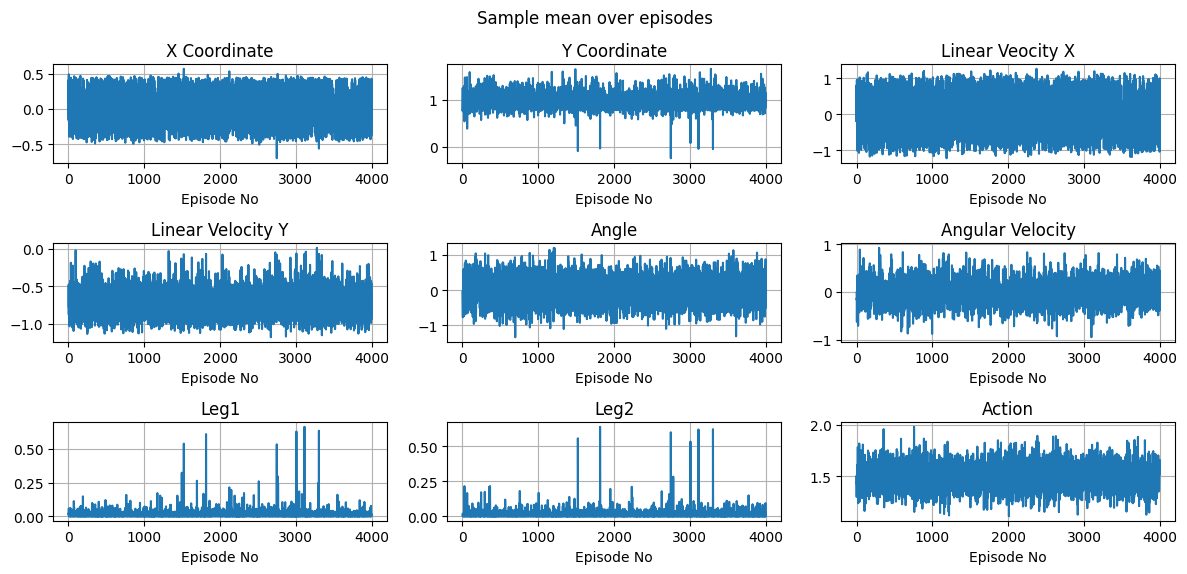

In [3]:
plot_descriptive_stats(mean_df, "Sample mean over episodes")

Если рассмотреть выборочное среднее внутри кадого эпизода, то можно заметить следующее:

* Х координата лунного модуля зажата внутри интервала [-0.5, 0.5]
* Y координата колеблется вокруг 1, но есть несколько эпизодов, где в среднем Y координата оказывалась около 0, скорее всего это означает, что в этих эпизодах лунный модуль касался поверхности луны
* линейные скорость по оси X допускает как движение влево, так и вправо, в то время как линейная скорость по оси Y в основном отрицательная, что говорит о том, что в большинстве эпизодов лунный модуль снижался к области посадки
* угол модуля колеблется в интервале [-1. 1], что говорит о том, что допускаются достаточно сильные повороты модуля как по, так и против часовой оси
* среднее значения внутри эпизода по переменным состояния ног 1 и 2 показывает долю итераций внутри эпизода, когда соответствующая нога модуля касалась области посадки. Видно, что в большинстве эпизодов данные показатели достаточно близки к 0, что означает, что ноги модуля в эпизоде достаточно редко касались области посадки
* среднее значение переменной выбранного действия показывает, какое действие было выбрано наиболее часто внутри эпизода. Видно, что среднее действие колеблется вокруг 1.5, что говорит о том, что в основном агент выбирал действия 1 (левый двигатель) и 2 (основной двигатель)

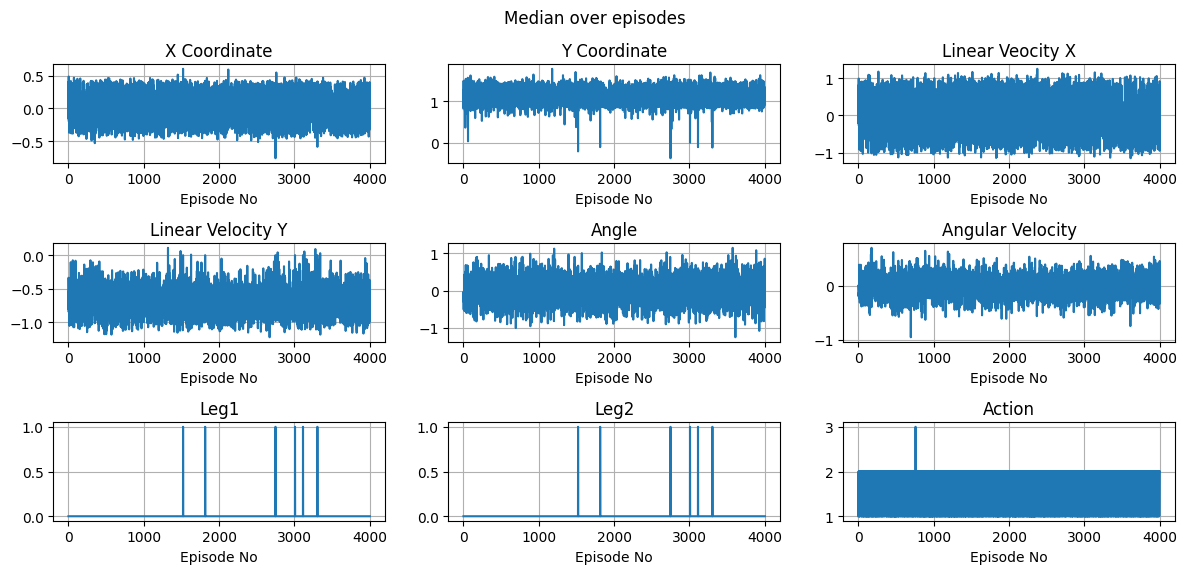

In [4]:
plot_descriptive_stats(median_df, "Median over episodes")

Из графика медианы доступных переменных состояния мы видим, что есть 6 эпизодов, где обе ноги лунного модуля успешно оказались приземлены. Также в сравнении со средними значениями внутри эпизодов мы видим, что агент в 50% случаев выбирал действия 1 (левый двигатель) и 2 (основной двигатель), что также совпадает с интерпретацией среднего действия внутри эпизода.

# Gymnasium

In [5]:
import gymnasium as gym

In [19]:
env = gym.make("LunarLander-v2")

num_episodes = 1000
all_rewards = []

In [20]:
for i_episode in range(num_episodes): 
    observation, info = env.reset()
    total_reward = 0
    done = False
    while not done:
        action = env.action_space.sample()
        observation, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        if terminated:
            done = True
        
    all_rewards.append(total_reward)

env.close()

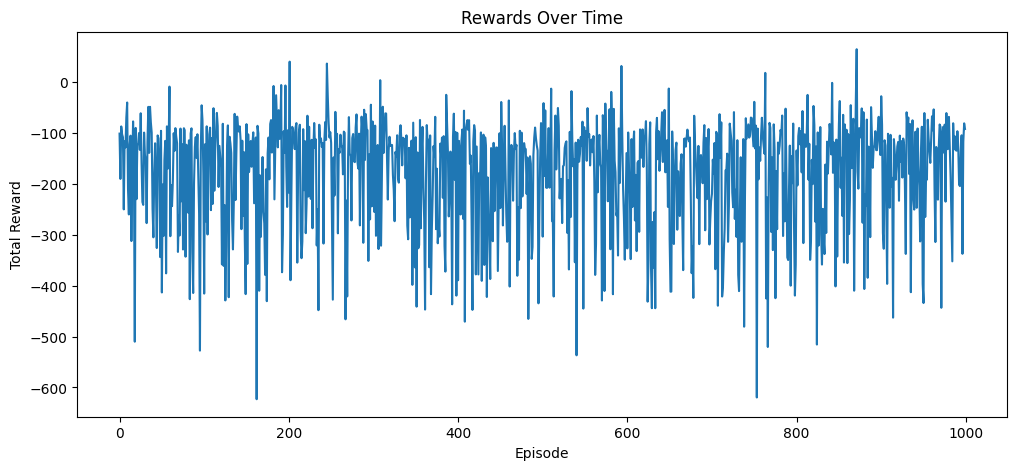

In [22]:
plt.figure(figsize=(12, 5))

plt.plot(all_rewards)
plt.title("Rewards Over Time")
plt.xlabel("Episode")
plt.ylabel("Total Reward")

plt.show()